<a href="https://colab.research.google.com/github/Chicken2322/Stock-Prediction/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
pip install pyramid-arima

In [18]:
from sklearn.preprocessing import MinMaxScaler
from pyramid.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from fastai.structured import  add_datepart
import warnings
warnings.filterwarnings('ignore')

In [19]:
#setting scaler in the the range between 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
df = pd.read_csv("/content/drive/My Drive/reliance_data.csv")
df=df.dropna()

In [21]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6034 entries, 0 to 6159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6034 non-null   object 
 1   Open       6034 non-null   float64
 2   High       6034 non-null   float64
 3   Low        6034 non-null   float64
 4   Close      6034 non-null   float64
 5   Adj Close  6034 non-null   float64
 6   Volume     6034 non-null   float64
dtypes: float64(6), object(1)
memory usage: 377.1+ KB


In [23]:
df.head()
df.tail()




,Date,Open,High,Low,Close,Adj Close,Volume
6155,2020-06-03,1545.000000,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
6156,2020-06-04,1544.000000,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
6157,2020-06-05,1595.000000,1618.000000,1573.699951,1581.699951,1581.699951,15264885.0
6158,2020-06-08,1618.400024,1618.400024,1565.000000,1569.500000,1569.500000,14497996.0
6159,2020-06-09,1560.300049,1583.000000,1533.000000,1537.150024,1537.150024,11933076.0


In [24]:
#We are converting date into date_time objects and setting it as index
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)

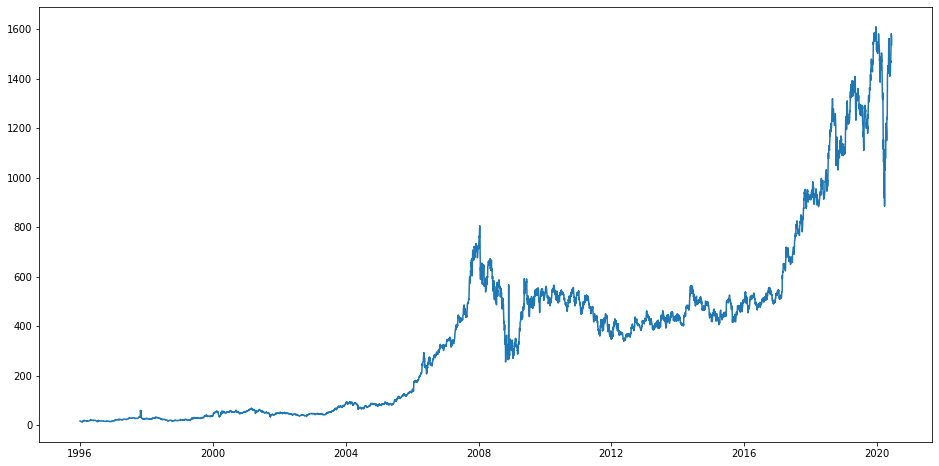

In [25]:
#plotting the closing price of the company 
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [26]:
#Now we are analysing our data by Moving Average Method and creating dataframe with date  
#and the target variable( In this case , CLOSING PRICE)
data = pd.DataFrame(data={'Date':df.Date,'Close': df.Close})
data.info()
data.size

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6034 entries, 1996-01-01 to 2020-06-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6034 non-null   datetime64[ns]
 1   Close   6034 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.4 KB


12068

In [27]:
#While splitting the data into train and validation set
#we cannot use random splitting since that will destroy the time component
#So here we slice the data 
length = int(data.size / data.columns.size * 0.92)
train = data[:length]
valid = data[length:]


In [28]:
print('Shape of training set:')
print(train.shape)

print('\n Shape of validation set:')
print(valid.shape)

Shape of training set:
(5551, 2)

 Shape of validation set:
(483, 2)


<Figure size 432x288 with 0 Axes>

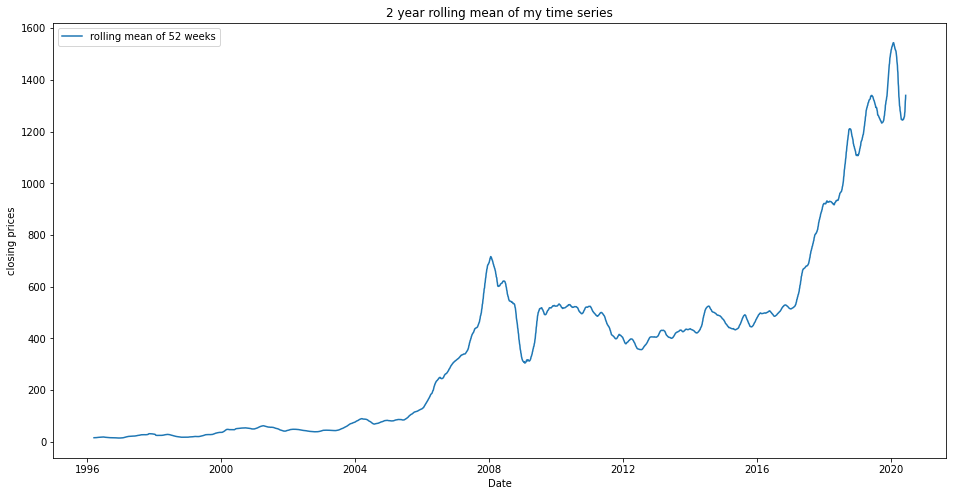

In [29]:
#Using rolling mean from Moving Average library 
plt.clf()
plt.figure(figsize=(16,8))
data_mean = data.rolling(window=52).mean()
plt.plot(data_mean ,label="rolling mean of 52 weeks" )
plt.xlabel("Date")
plt.ylabel("closing prices")
plt.title("2 year rolling mean of my time series")
plt.legend(loc="upper left")
plt.show()

In [30]:
preds=[]
valid_size= valid.Close.size
train_size= train.Close.size
for i in range(0 , valid_size):
    a = train['Close'][train_size - 365 + i:].sum() + sum(preds)
    b = a/365
    preds.append(b)

In [31]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
406.99209506820705


<Figure size 432x288 with 0 Axes>

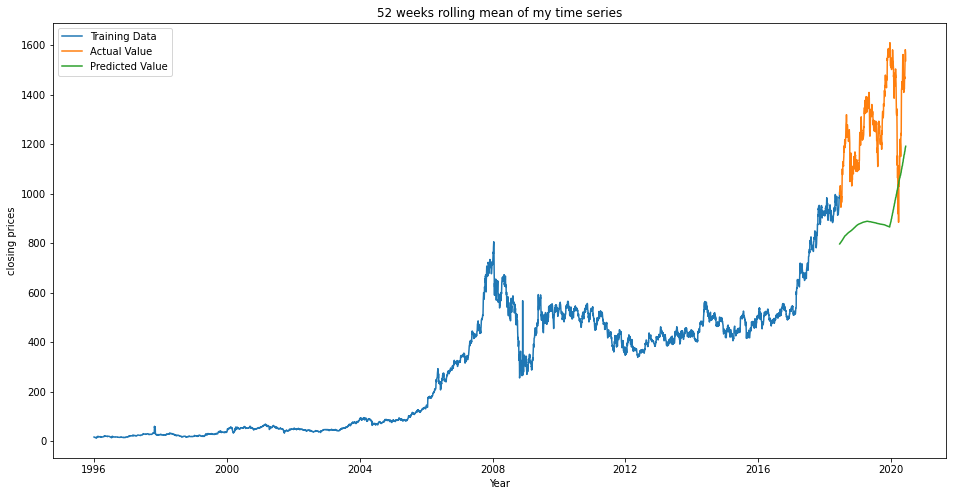

In [32]:
#plotting prediction we did using Moving Average (Manually)
plt.clf()
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'], label="Training Data")
plt.plot(valid[['Close']] , label='Actual Value')
plt.plot(valid[[ 'Predictions']] , label='Predicted Value')

plt.xlabel("Year")
plt.ylabel("closing prices")
plt.title("52 weeks rolling mean of my time series")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Now we implement Linear regression model 
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

In [ ]:
#split into train and validation
length = int(new_data.size / new_data.columns.size * 0.96)
train = new_data[:987]
valid = new_data[987:]


In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

In [ ]:
plt.clf()
plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[length:].index
train.index = new_data[:length].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel("Year")
plt.ylabel("The values of Closing price")
plt.title("1 year stock prediction")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Now we implement ARIMA models (Auto Regressive Integrated Moving Average)
data = df.sort_index(ascending=True, axis=0)
length = int(data.size / data.columns.size * 0.96)

train = data[:length]
valid = data[length:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast_data = model.predict(n_periods=validation.size)
forecast_data = pd.DataFrame(forecast_data,index = valid.index,columns=['Prediction'])


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=43082.524, BIC=43115.834, Fit time=73.044 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=46698.694, BIC=46712.018, Fit time=0.513 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=45118.980, BIC=45145.628, Fit time=11.391 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=43097.603, BIC=43124.250, Fit time=54.530 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=43060.803, BIC=43100.775, Fit time=51.823 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=44956.456, BIC=44989.766, Fit time=59.798 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=43080.420, BIC=43127.054, Fit time=127.839 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=46369.136, BIC=46395.784, Fit time=25.446 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=43061.588, BIC=43114.884, Fit time=177.626 seconds


In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast_data['Prediction'])),2)))
print("RMS value from ARIMA Model {}".format(rms))

In [ ]:
#plotting prediction we did using ARIMA models
plt.clf()
plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="training data")
plt.plot(valid['Close'],label="Validation data")
plt.plot(forecast_data['Prediction'],label="Predicted data")
plt.xlabel("Year")
plt.ylabel("The values of Closing price")
plt.title("1 year stock prediction")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Now we implement LSTM models (Auto Regressive Integrated Moving Average)
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
dataset = new_data.values
length = int(dataset.size * 0.96)
train = dataset[0:length,:]
valid = dataset[length:,:]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(.format(rms))

In [ ]:
#plotting the forcast values
plt.clf()
plt.figure(figsize=(16,8))
train = new_data[:length]
valid = new_data[length:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],label="training data")
plt.plot(valid[['Close']],label="validation data")
plt.plot(valid[['Predictions']],label="forcasting data")
plt.xlabel("Year")
plt.ylabel("The values of Closing price")
plt.title("1 year stock prediction")
plt.legend(loc="upper left")
plt.show()
